# Clustering
# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [9]:
# Import Data
crime_data = pd.read_csv("crime_data.csv")
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Hierarchical Clustring Model

In [10]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [11]:
df_norm = norm_func(crime_data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Average

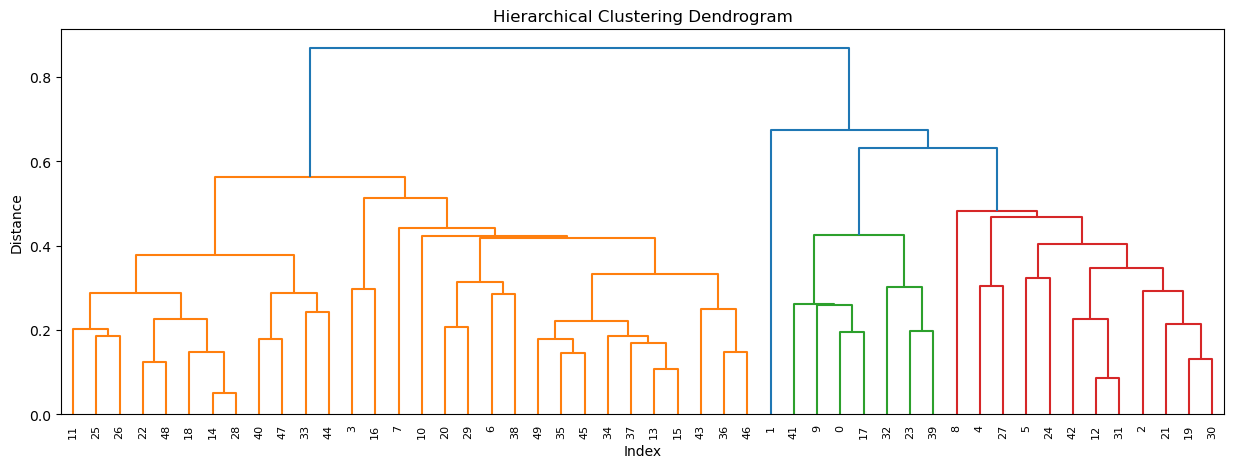

In [12]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

In [14]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df_norm['clust']=cluster_labels # creating a  new column and assigning it to new column 
df_norm

,Murder,Assault,UrbanPop,Rape,clust
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


In [28]:
df_norm.iloc[:,:].groupby(df_norm.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust_1
clust,,,,,
0,0.316600,0.325533,0.666667,0.294143,1.0
1,0.607430,0.725742,0.785311,0.644703,0.0
2,0.554217,0.746575,0.271186,0.961240,3.0
3,0.835628,0.706458,0.377724,0.371724,2.0
4,0.138052,0.106164,0.340395,0.117140,4.0


In [29]:
Data_0 = df_norm[(df_norm.clust==0)]
Data_0

,Murder,Assault,UrbanPop,Rape,clust,clust_1
3,0.481928,0.496575,0.305085,0.315245,0,1
6,0.150602,0.222603,0.762712,0.098191,0,1
7,0.307229,0.660959,0.677966,0.219638,0,1
10,0.271084,0.003425,0.864407,0.333333,0,1
13,0.385542,0.232877,0.559322,0.354005,0,1
15,0.313253,0.239726,0.576271,0.276486,0,1
16,0.536145,0.219178,0.338983,0.232558,0,1
20,0.216867,0.356164,0.898305,0.232558,0,1
29,0.397590,0.390411,0.966102,0.297158,0,1
34,0.391566,0.256849,0.728814,0.364341,0,1


In [30]:
Data_1 = df_norm[(df_norm.clust==1)]
Data_1

,Murder,Assault,UrbanPop,Rape,clust,clust_1
2,0.439759,0.852740,0.813559,0.612403,1,0
4,0.493976,0.791096,1.000000,0.860465,1,0
5,0.427711,0.544521,0.779661,0.811370,1,0
8,0.879518,0.993151,0.813559,0.635659,1,0
12,0.578313,0.698630,0.864407,0.431525,1,0
19,0.632530,0.873288,0.593220,0.529716,1,0
21,0.680723,0.719178,0.711864,0.718346,1,0
24,0.493976,0.455479,0.644068,0.540052,1,0
27,0.686747,0.708904,0.830508,1.000000,1,0
30,0.638554,0.821918,0.644068,0.640827,1,0


In [31]:
Data_2 = df_norm[(df_norm.clust==2)]
Data_2

,Murder,Assault,UrbanPop,Rape,clust,clust_1
1,0.554217,0.746575,0.271186,0.96124,2,3


In [34]:
Data_3 = df_norm[(df_norm.clust==3)]
Data_3

,Murder,Assault,UrbanPop,Rape,clust,clust_1
0,0.746988,0.654110,0.440678,0.359173,3,2
9,1.000000,0.568493,0.474576,0.478036,3,2
17,0.879518,0.698630,0.576271,0.385013,3,2
23,0.921687,0.732877,0.203390,0.253230,3,2
32,0.734940,1.000000,0.220339,0.227390,3,2
39,0.819277,0.801370,0.271186,0.392765,3,2
41,0.746988,0.489726,0.457627,0.506460,3,2


In [35]:
Data_4 = df_norm[(df_norm.clust==4)]
Data_4

,Murder,Assault,UrbanPop,Rape,clust,clust_1
11,0.108434,0.256849,0.372881,0.178295,4,4
14,0.084337,0.037671,0.423729,0.103359,4,4
18,0.078313,0.130137,0.322034,0.012920,4,4
22,0.114458,0.092466,0.576271,0.196382,4,4
25,0.313253,0.219178,0.355932,0.235142,4,4
26,0.210843,0.195205,0.508475,0.237726,4,4
28,0.078313,0.041096,0.406780,0.056848,4,4
33,0.000000,0.000000,0.203390,0.000000,4,4
40,0.180723,0.140411,0.220339,0.142119,4,4
44,0.084337,0.010274,0.000000,0.100775,4,4


# Standardisation 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_subset = pd.DataFrame(scaler.fit_transform(df_norm.iloc[:,1:7]))
Data_subset 

,0,1,2,3,4
0,0.790787,-0.526195,-0.003451,0.820928,0.230045
1,1.118060,-1.224067,2.509424,0.208295,0.906648
2,1.493817,1.009122,1.053466,-0.404338,-1.123161
3,0.233212,-1.084492,-0.186794,-1.016971,-0.446558
4,1.275635,1.776781,2.088814,-0.404338,-1.123161
5,0.402909,0.869548,1.883901,-0.404338,-1.123161
6,-0.736484,0.799761,-1.092723,-1.016971,-0.446558
7,0.815030,0.450825,-0.585834,-1.016971,-0.446558
8,1.990786,1.009122,1.150530,-0.404338,-1.123161
9,0.487757,-0.386621,0.492653,0.820928,0.230045


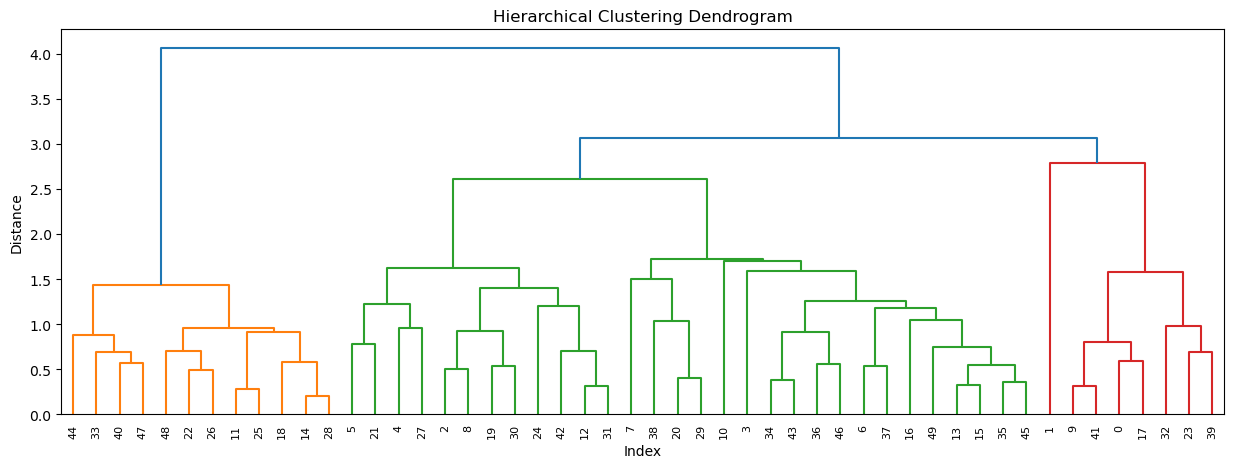

In [39]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(Data_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

# single

In [41]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df_norm['clust_s']=cluster_labels # creating a  new column and assigning it to new column 
df_norm

,Murder,Assault,UrbanPop,Rape,clust,clust_1,clust_s
0,0.746988,0.654110,0.440678,0.359173,3,4,4
1,0.554217,0.746575,0.271186,0.961240,2,3,3
2,0.439759,0.852740,0.813559,0.612403,1,0,0
3,0.481928,0.496575,0.305085,0.315245,0,1,1
4,0.493976,0.791096,1.000000,0.860465,1,0,0
5,0.427711,0.544521,0.779661,0.811370,1,0,0
6,0.150602,0.222603,0.762712,0.098191,0,1,1
7,0.307229,0.660959,0.677966,0.219638,0,1,1
8,0.879518,0.993151,0.813559,0.635659,1,0,0
9,1.000000,0.568493,0.474576,0.478036,3,4,4


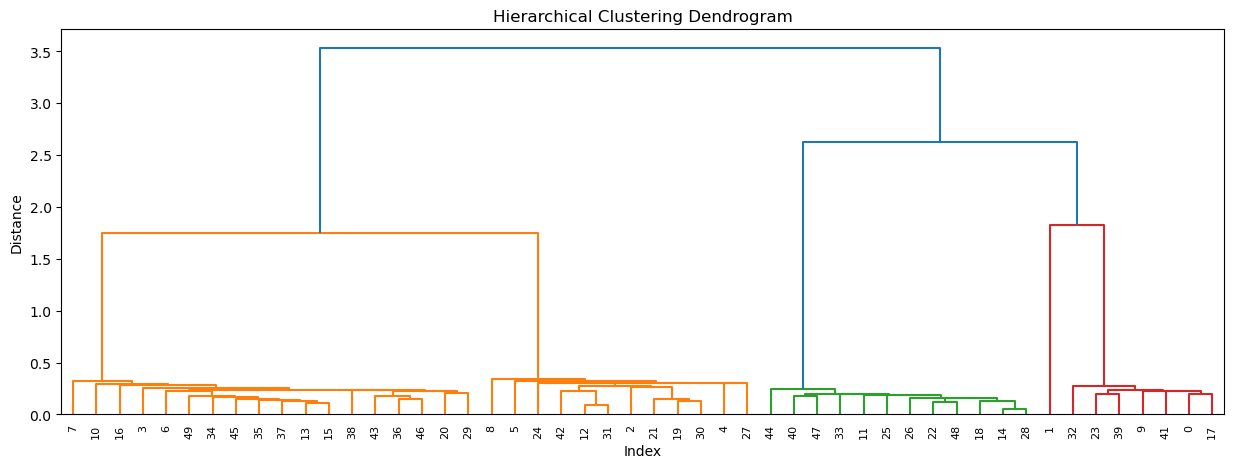

In [42]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

In [45]:
df_norm.iloc[:,1:].groupby(df_norm.clust_s).mean()

,Assault,UrbanPop,Rape,clust,clust_1,clust_s
clust_s,,,,,,
0,0.725742,0.785311,0.644703,1.0,0.0,0.0
1,0.325533,0.666667,0.294143,0.0,1.0,1.0
2,0.106164,0.340395,0.117140,4.0,2.0,2.0
3,0.746575,0.271186,0.961240,2.0,3.0,3.0
4,0.706458,0.377724,0.371724,3.0,4.0,4.0


# Complete

In [47]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df_norm['clust_c']=cluster_labels # creating a  new column and assigning it to new column 
df_norm

,Murder,Assault,UrbanPop,Rape,clust,clust_1,clust_s,clust_c
0,0.746988,0.654110,0.440678,0.359173,3,4,4,3
1,0.554217,0.746575,0.271186,0.961240,2,3,3,4
2,0.439759,0.852740,0.813559,0.612403,1,0,0,1
3,0.481928,0.496575,0.305085,0.315245,0,1,1,0
4,0.493976,0.791096,1.000000,0.860465,1,0,0,1
5,0.427711,0.544521,0.779661,0.811370,1,0,0,1
6,0.150602,0.222603,0.762712,0.098191,0,1,1,0
7,0.307229,0.660959,0.677966,0.219638,0,1,1,0
8,0.879518,0.993151,0.813559,0.635659,1,0,0,1
9,1.000000,0.568493,0.474576,0.478036,3,4,4,3


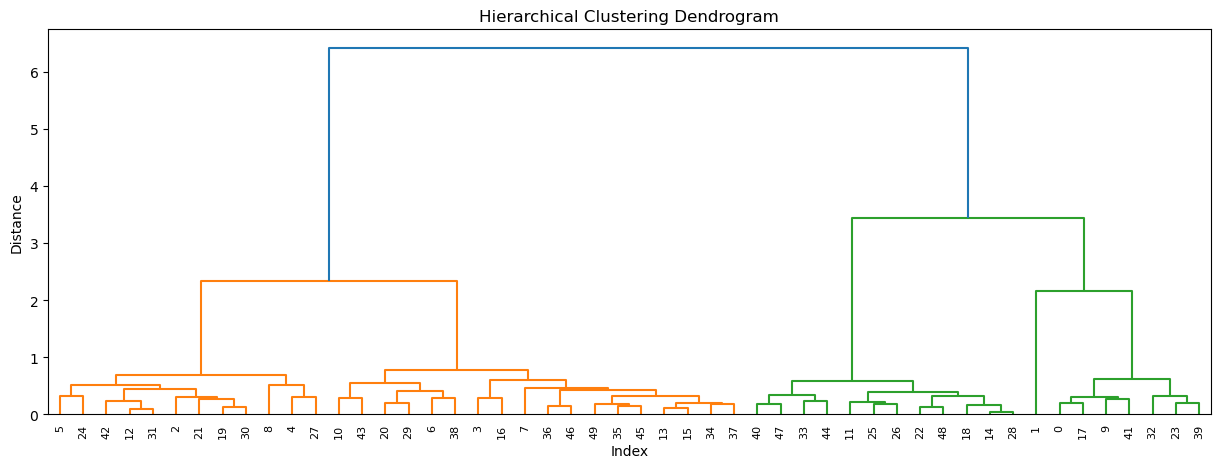

In [48]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

In [51]:
df_norm.iloc[:,1:].groupby(df_norm.clust_c).mean()

,Assault,UrbanPop,Rape,clust,clust_1,clust_s,clust_c
clust_c,,,,,,,
0,0.325533,0.666667,0.294143,0.0,1.0,1.0,0.0
1,0.725742,0.785311,0.644703,1.0,0.0,0.0,1.0
2,0.106164,0.340395,0.117140,4.0,2.0,2.0,2.0
3,0.706458,0.377724,0.371724,3.0,4.0,4.0,3.0
4,0.746575,0.271186,0.961240,2.0,3.0,3.0,4.0


# Kmeans Clustering Model

In [52]:
from sklearn.cluster import KMeans

In [53]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X 

array([4.05437300e-01, 9.18081497e-01, 6.71584517e-01, 2.37779017e-01,
       4.40456046e-01, 9.17999083e-01, 6.84607704e-01, 4.00463078e-01,
       6.46873894e-01, 8.89289441e-01, 7.81400843e-01, 8.98109272e-01,
       6.42813548e-01, 5.40318614e-01, 8.64950984e-02, 7.17338133e-01,
       4.03735206e-01, 4.62929287e-02, 4.75600090e-01, 6.90706151e-01,
       7.00360247e-01, 3.99689143e-01, 5.12407078e-01, 6.87399396e-01,
       9.58756031e-01, 7.18929416e-01, 3.77392463e-01, 7.47090608e-02,
       6.77231642e-01, 2.36928235e-01, 9.92996405e-01, 1.65838806e-01,
       2.71586477e-01, 8.30496567e-01, 2.48814782e-01, 8.63900441e-01,
       8.17424607e-01, 5.58063150e-01, 5.45016391e-01, 1.31851163e-01,
       6.07345291e-01, 1.93389170e-01, 3.38020541e-01, 9.31823329e-02,
       2.60913922e-01, 4.38671708e-02, 9.83109262e-01, 2.36765931e-01,
       6.21786399e-01, 3.98929792e-01, 5.34779581e-01, 5.22178512e-01,
       7.03498970e-01, 9.48045251e-02, 5.48215374e-01, 8.61464133e-01,
      

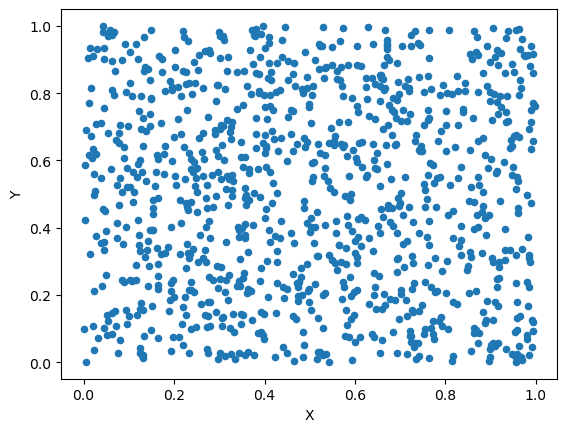

In [54]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

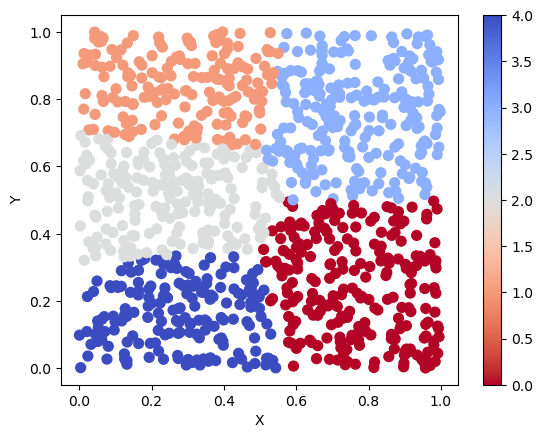

In [55]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

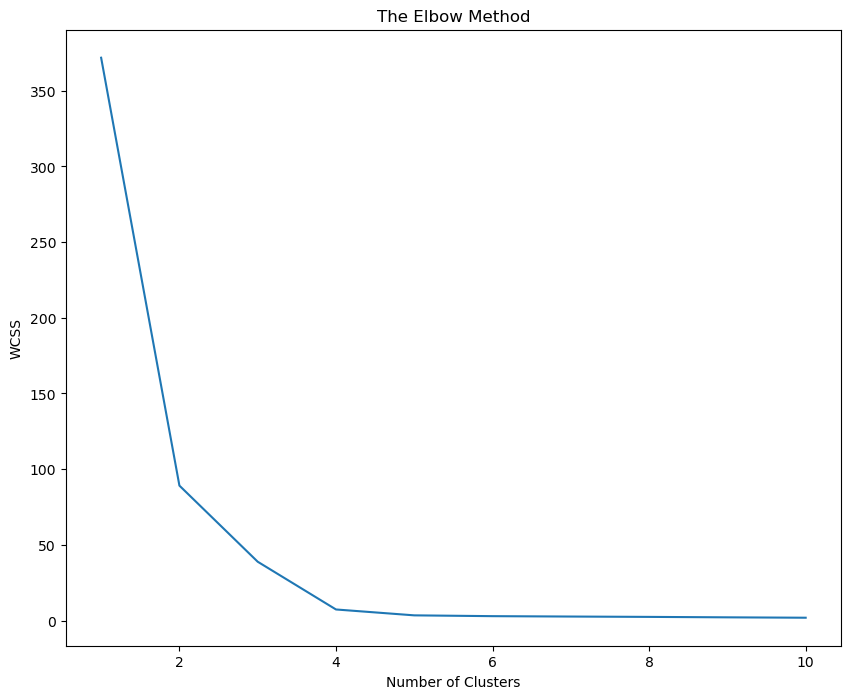

In [56]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [57]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm) 

In [58]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([0, 4, 1, 3, 1, 1, 3, 3, 1, 0, 3, 2, 1, 3, 2, 3, 3, 0, 2, 1, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 3, 0, 2, 0, 1, 3,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [59]:
y_kmeans

array([0, 4, 1, 3, 1, 1, 3, 3, 1, 0, 3, 2, 1, 3, 2, 3, 3, 0, 2, 1, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 3, 0, 2, 0, 1, 3,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [60]:
clf.cluster_centers_ 

array([[ 8.35628227e-01,  7.06457926e-01,  3.77723971e-01,
         3.71723883e-01,  3.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  3.00000000e+00],
       [ 6.07429719e-01,  7.25742009e-01,  7.85310734e-01,
         6.44702842e-01,  1.00000000e+00, -2.22044605e-16,
        -2.22044605e-16,  1.00000000e+00],
       [ 1.38052209e-01,  1.06164384e-01,  3.40395480e-01,
         1.17140396e-01,  4.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  2.00000000e+00],
       [ 3.16599732e-01,  3.25532725e-01,  6.66666667e-01,
         2.94142980e-01,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  2.22044605e-16],
       [ 5.54216867e-01,  7.46575342e-01,  2.71186441e-01,
         9.61240310e-01,  2.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  4.00000000e+00]])

In [61]:
clf.inertia_

3.423303892139682

In [64]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime_data['clust_k']=md # creating a  new column and assigning it to new column 
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_k
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


In [65]:
crime_data.iloc[:,1:7].groupby(crime_data.clust_k).mean() 

,Murder,Assault,UrbanPop,Rape,clust_k
clust_k,,,,,
0,14.671429,251.285714,54.285714,21.685714,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,3.091667,76.000000,52.083333,11.833333,2.0
3,6.055556,140.055556,71.333333,18.683333,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


In [66]:
plt.style.use(['classic']) 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [67]:
#Normalizing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(crime_data.iloc[:,1:])
scaled_data_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.69817903],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.91496784],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.79489231],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  1.01168112],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.79489231],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.79489231],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  1.01168112],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  1.01168112],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.79489231],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.69817903],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  1.01168112],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.10839441],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.79489231],
       [-0.13637203, -0.70012057, -0.0

# Elbow Method

In [71]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    if i>5:
        break
wcss

[250.0,
 123.23839555965748,
 92.14132262683776,
 65.9543896437117,
 53.384530979955855,
 44.79325266517604]

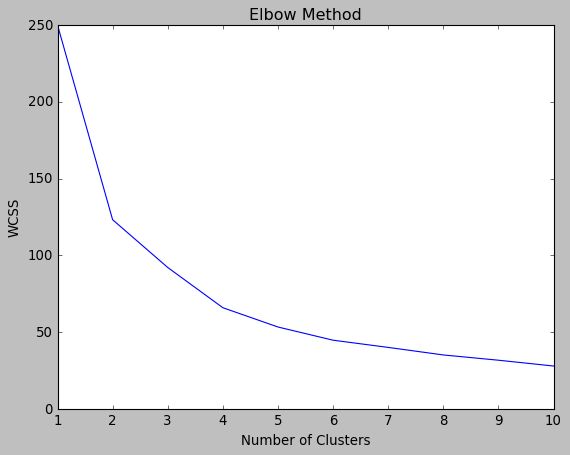

In [72]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [73]:
WCSS 

[371.82412255025645,
 89.14124903914532,
 38.85639624027528,
 7.30802531248332,
 3.423303892139682,
 2.8911643451010383,
 2.6352266088766294,
 2.406889880211557,
 2.1153007356739693,
 1.8591208176805558]

# DB Scan Clustering Model

In [74]:
from sklearn.cluster import DBSCAN

In [77]:
# Import Data
data = pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [78]:
Data_db = data.drop(['Unnamed: 0'],axis=1)

In [79]:
array=Data_db.values
array  

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data_subset1 = pd.DataFrame(scaler.fit_transform(array))
Data_subset1 

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [88]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

neighbors = NearestNeighbors(n_neighbors=6)
fitneighbors = neighbors.fit(scaled_data_df)
distances, indices = fitneighbors.kneighbors(scaled_data_df)


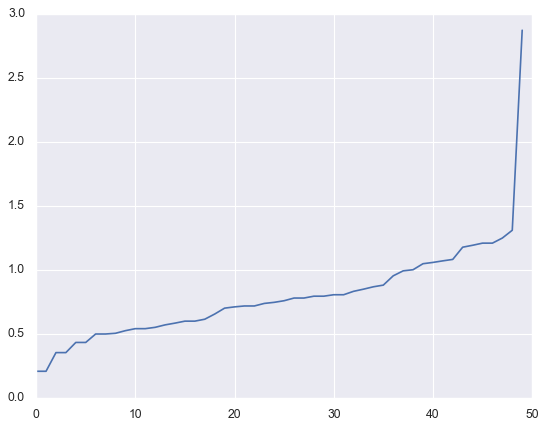

In [89]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)


In [99]:
dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan.fit(Data_subset1)

DBSCAN(eps=1.2, min_samples=4)

In [100]:
#Noisy samples are given the label -1.
dbscan.labels_  

array([ 0, -1,  1,  1, -1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [101]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_D'])   

In [102]:
cl
pd.set_option("display.max_rows", None)  

In [103]:
cl
pd.set_option("display.max_rows", None)  

In [104]:
cl

,cluster_D
0,0
1,-1
2,1
3,1
4,-1
5,-1
6,1
7,1
8,-1
9,0


In [105]:
import sklearn
sklearn.metrics.silhouette_score(Data_subset1 ,dbscan.labels_)

0.2677430171383357

In [106]:
Data1 = pd.concat([Data_db,cl],axis=1)  
Data1   

,Murder,Assault,UrbanPop,Rape,cluster_D
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


Text(0.5, 1.0, 'Clusters using DBScan')

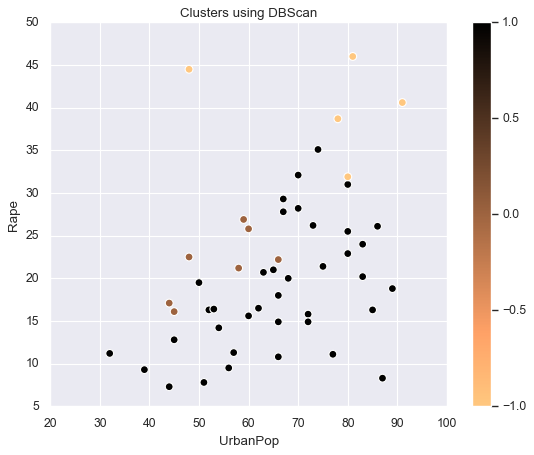

In [108]:
Data1.plot(x="UrbanPop",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [112]:
import sklearn
sklearn.metrics.silhouette_score(Data_subset1,dbscan.labels_)   

0.2677430171383357